In [2]:
import pandas as pd 


df = pd.read_csv('car sale.csv')

In [5]:
df.isna().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [7]:
df['Customer Name'].dropna()

0        Geraldine
1              Gia
2           Gianna
3          Giselle
4            Grace
           ...    
23901       Martin
23902        Jimmy
23903         Emma
23904     Victoire
23905      Donovan
Name: Customer Name, Length: 23905, dtype: object

In [8]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [10]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [3]:
# 1. Average selling price of cars for each dealer
avg_price_per_dealer = df.groupby("Dealer_Name")["Price ($)"].mean().sort_values(ascending=False)
print(avg_price_per_dealer)

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

In [4]:
# 2. Car brand with the highest variation in prices
price_variation = df.groupby("Company")["Price ($)"].std().sort_values(ascending=False)
print(price_variation)


Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


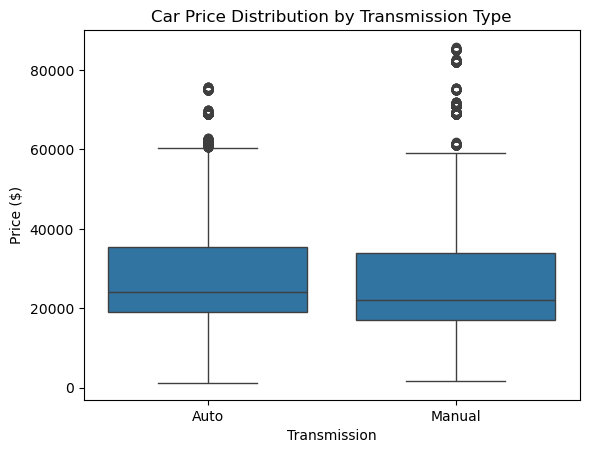

In [7]:
# 3. Distribution of car prices for each transmission type
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="Transmission", y="Price ($)", data=df)
plt.title("Car Price Distribution by Transmission Type")
plt.show()

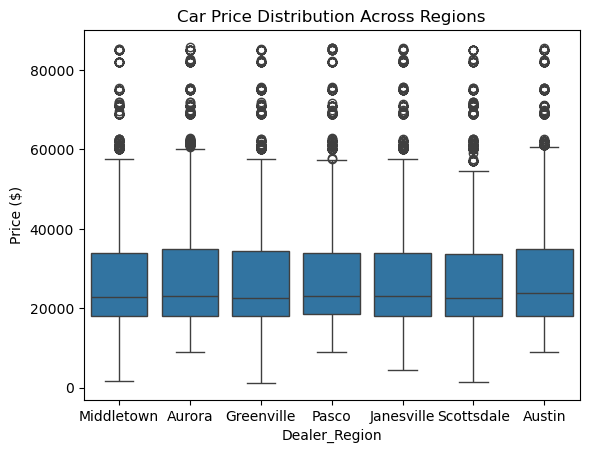

In [8]:
# 4. Distribution of car prices across different regions
sns.boxplot(x="Dealer_Region", y="Price ($)", data=df)
plt.title("Car Price Distribution Across Regions")
plt.show()

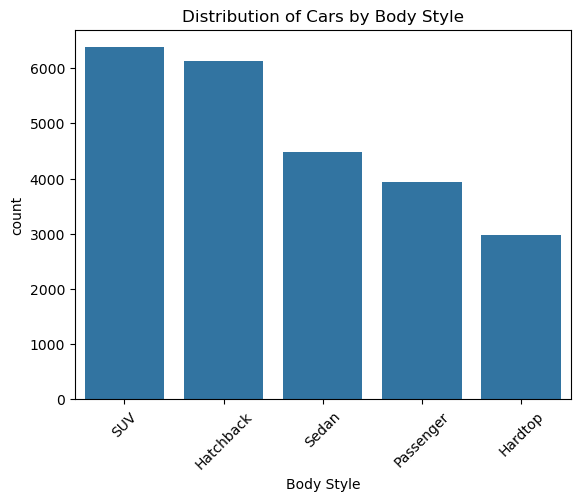

In [9]:
# 5. Distribution of cars based on body styles
sns.countplot(x="Body Style", data=df, order=df["Body Style"].value_counts().index)
plt.title("Distribution of Cars by Body Style")
plt.xticks(rotation=45)
plt.show()

In [10]:
# 6. Average selling price of cars by gender and income
avg_price_gender_income = df.groupby(["Gender", pd.cut(df["Annual Income"], bins=5)])["Price ($)"].mean().unstack()
print(avg_price_gender_income)


Annual Income  (-1109.92, 2248064.0]  (2248064.0, 4486048.0]  \
Gender                                                         
Female                  28218.888484             30183.05298   
Male                    27996.376891             29021.87871   

Annual Income  (4486048.0, 6724032.0]  (6724032.0, 8962016.0]  \
Gender                                                          
Female                   28318.875000                     NaN   
Male                     27520.139535            40333.333333   

Annual Income  (8962016.0, 11200000.0]  
Gender                                  
Female                             NaN  
Male                           26001.0  


C:\Users\vinay\AppData\Local\Temp\ipykernel_4560\3766938973.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_gender_income = df.groupby(["Gender", pd.cut(df["Annual Income"], bins=5)])["Price ($)"].mean().unstack()


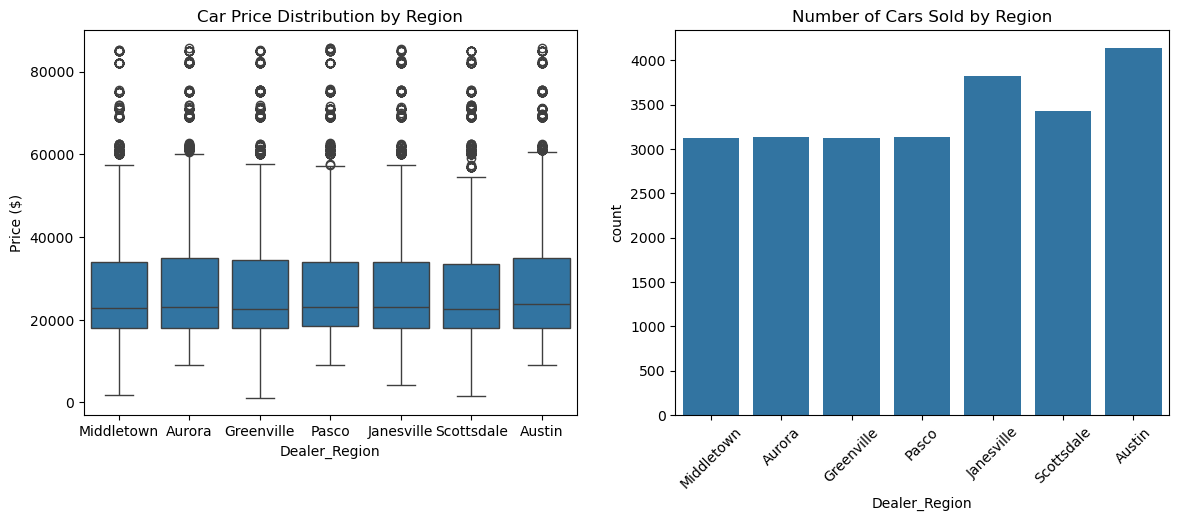

In [11]:
# 7. Car price distribution and number of sales by region
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(x="Dealer_Region", y="Price ($)", data=df, ax=ax[0])
ax[0].set_title("Car Price Distribution by Region")
sns.countplot(x="Dealer_Region", data=df, ax=ax[1])
ax[1].set_title("Number of Cars Sold by Region")
plt.xticks(rotation=45)
plt.show()


In [12]:
# 8. Average car price for different engine sizes
avg_price_by_engine = df.groupby("Engine")["Price ($)"].mean().sort_values(ascending=False)
print(avg_price_by_engine)

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


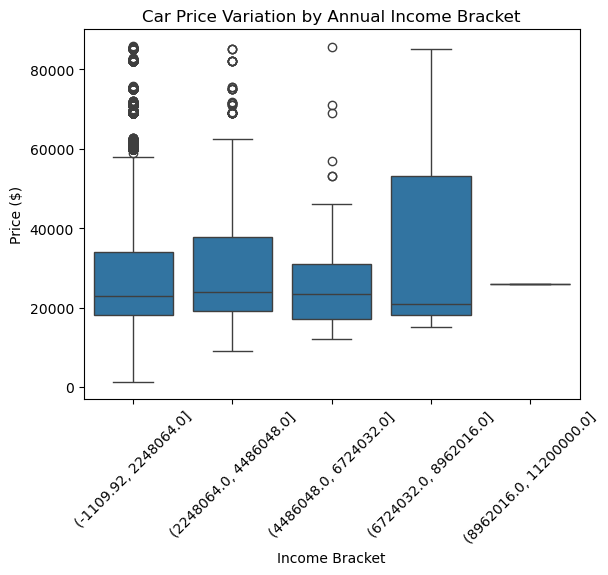

In [13]:
# 9. Car prices based on annual income bracket
df["Income Bracket"] = pd.cut(df["Annual Income"], bins=5)
sns.boxplot(x="Income Bracket", y="Price ($)", data=df)
plt.title("Car Price Variation by Annual Income Bracket")
plt.xticks(rotation=45)
plt.show()

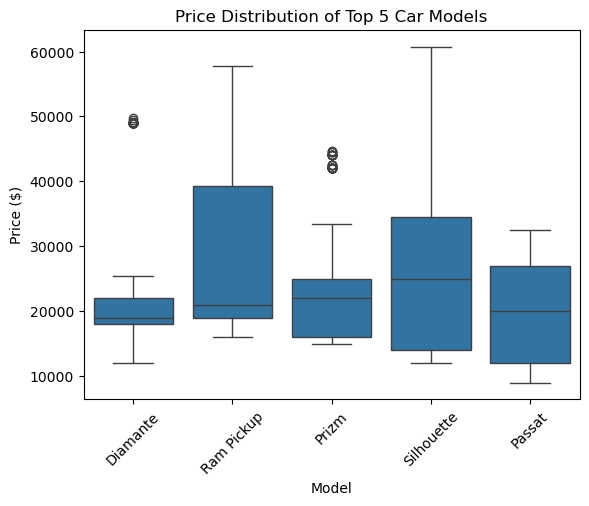

In [14]:
# 10. Top 5 car models with the highest sales and their price distribution
top_models = df["Model"].value_counts().head(5).index
df_top_models = df[df["Model"].isin(top_models)]
sns.boxplot(x="Model", y="Price ($)", data=df_top_models)
plt.title("Price Distribution of Top 5 Car Models")
plt.xticks(rotation=45)
plt.show()

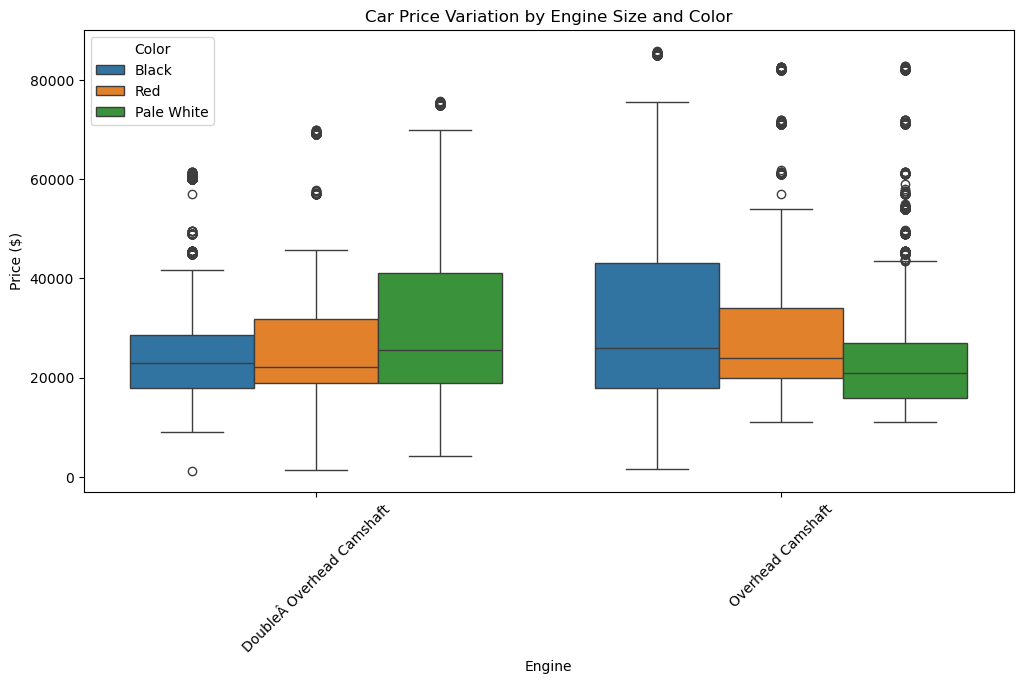

In [15]:
# 11. Car price variation with engine size across colors
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x="Engine", y="Price ($)", hue="Color", data=df)
plt.title("Car Price Variation by Engine Size and Color")
plt.xticks(rotation=45)
plt.show()

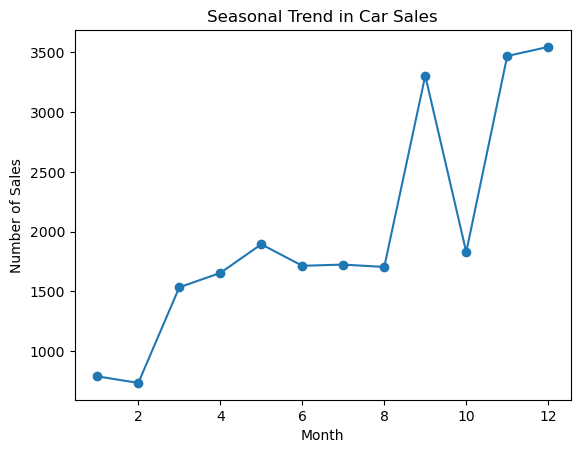

In [16]:
# 12. Seasonal trend in car sales
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
sales_by_month = df.groupby("Month").size()
sales_by_month.plot(kind="line", marker="o")
plt.title("Seasonal Trend in Car Sales")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.show()

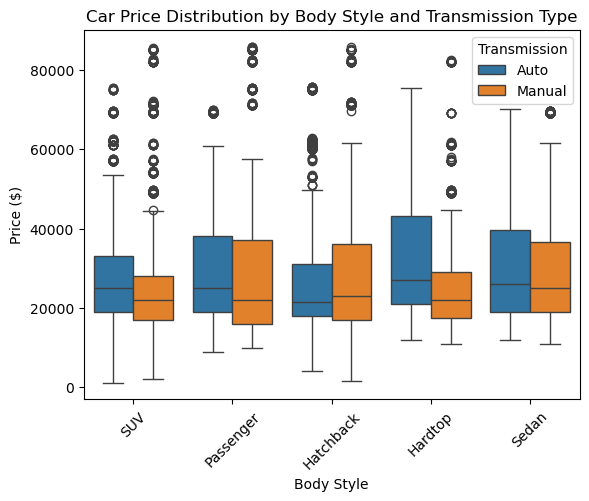

In [17]:
# 13. Car price distribution by body style and transmission type
sns.boxplot(x="Body Style", y="Price ($)", hue="Transmission", data=df)
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xticks(rotation=45)
plt.show()


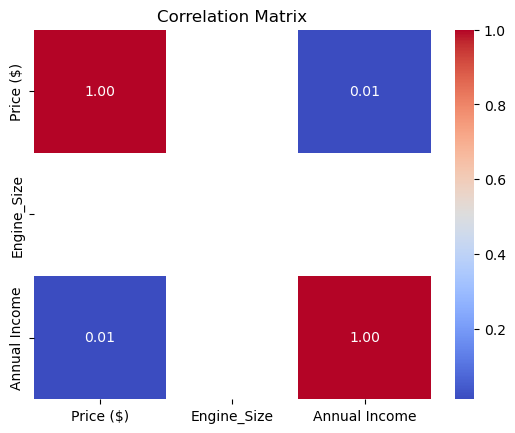

In [18]:
# 14. Correlation between car price, engine size, and customer income
df["Engine_Size"] = df["Engine"].str.extract(r'(\d+)').astype(float)  # Extracting numeric part of Engine
corr_matrix = df[["Price ($)", "Engine_Size", "Annual Income"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [19]:
# 15. Average car price across different models and engine types
avg_price_model_engine = df.groupby(["Model", "Engine"])["Price ($)"].mean().unstack()
print(avg_price_model_engine)

Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]
